## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.
6. Split the dataset obtained in step 5 as `input/train.csv`,`input/test.csv`,`input/validation.csv`

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utils.pipeline import prepare_dataset

df = pd.read_csv('../data/raw/pokemon_team_rocket_dataset.csv')
df.sample(4)

,ID,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
603,603,60,Saffron City,Middle,Rocket Grunt,Steel,21,1,LuxuryBall,57,4,False,Unpredictable,16,True,377420,False,Yes
896,896,61,Pallet Town,Low,Champion,Poison,79,0,UltraBall,58,1,False,Defensive,10,False,6072,True,No
2968,2968,31,Pewter City,Middle,Scientist,Ground,44,0,UltraBall,61,5,False,Aggressive,6,False,44904,True,No
2420,2420,22,Celadon City,Low,Elite Trainer,Dark,18,0,MasterBall,64,1,False,Aggressive,24,False,54264,True,No


# 📊 _Exploratory Analysis of Citizens Dataset_

### Let's test out some fields that can have direct relations with Team Rocket membership

## Pokemon Types

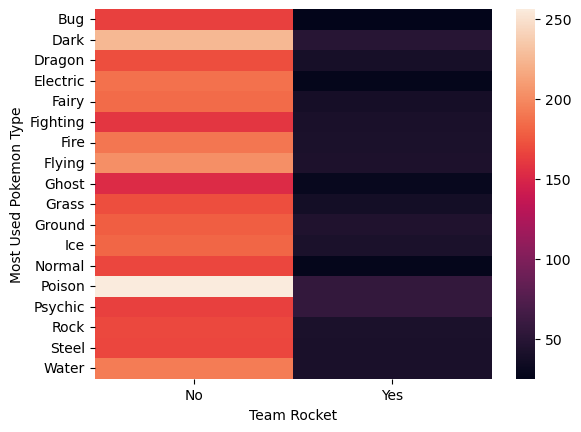

In [44]:
df1 = df[['Most Used Pokemon Type','Team Rocket']]
sns.heatmap(pd.crosstab(df1['Most Used Pokemon Type'], df1['Team Rocket']))
plt.show()

In [45]:
team_rocket_stats = df[df['Team Rocket'] == 'Yes']['Most Used Pokemon Type'].value_counts().reset_index()
team_rocket_stats.columns = ['Pokemon Type', 'Count']

team_rocket_stats.head(10)

,Pokemon Type,Count
0,Poison,56
1,Psychic,56
2,Dark,49
3,Ground,44
4,Flying,43
5,Fire,42
6,Ice,42
7,Rock,42
8,Fighting,41
9,Steel,41


According to my analysis, the most commom pokemon types for Team Rocket members are:
- Poison: 56
- Psychic: 56
- Dark: 49
- Ground: 44

## Economic Status 

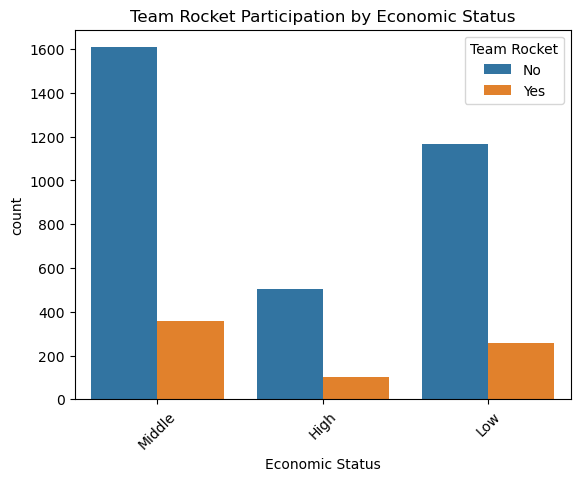

In [46]:
# Graph to visualize Team Rocket members per Economic Status bracket
sns.countplot(data=df, x='Economic Status', hue='Team Rocket')
plt.title('Team Rocket Participation by Economic Status')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Percentage of Team Rocket members per Economic Status bracket
status_percentages = df.groupby('Economic Status')['Team Rocket'].value_counts(normalize=True).unstack() * 100
print("\n% Per bracket of Economic Status:")
print(status_percentages.round(2))


% Per bracket of Economic Status:
Team Rocket         No    Yes
Economic Status              
High             82.92  17.08
Low              81.95  18.05
Middle           81.75  18.25


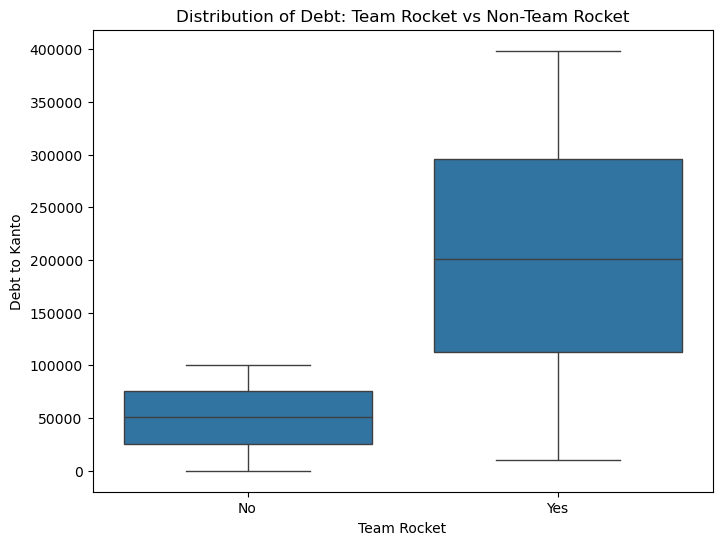

In [48]:
# Boxplot to visualize Debt distribution between Team Rocket and non-Team Rocket
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Team Rocket', y='Debt to Kanto')
plt.title('Distribution of Debt: Team Rocket vs Non-Team Rocket')
plt.ylabel('Debt to Kanto')
plt.show()


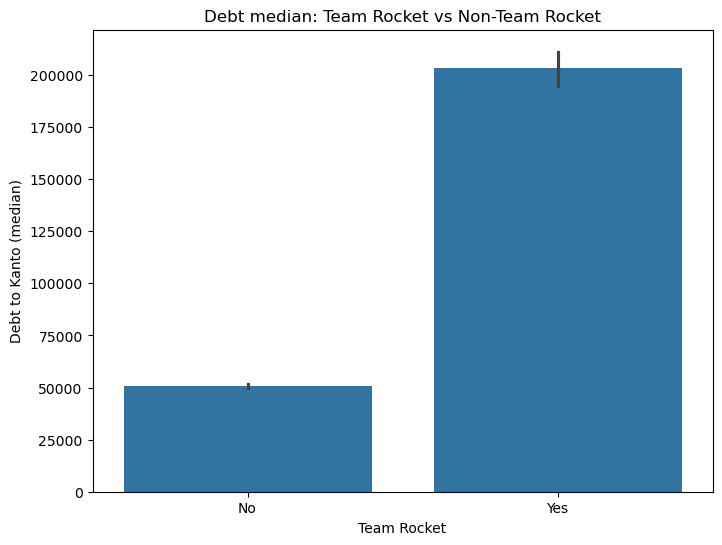

In [49]:
# Barplot to visualize average Debt between Team Rocket and non-Team Rocket
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Team Rocket', y='Debt to Kanto')
plt.title('Debt median: Team Rocket vs Non-Team Rocket')
plt.ylabel('Debt to Kanto (median)')
plt.show()

### Conclusion:
- There is no relevant correlation between Economic Status and Team Rocket membership.
- There is a large positive correlation (0.68) between Team Rocket membership and Debt, having

## PokéBall Usage

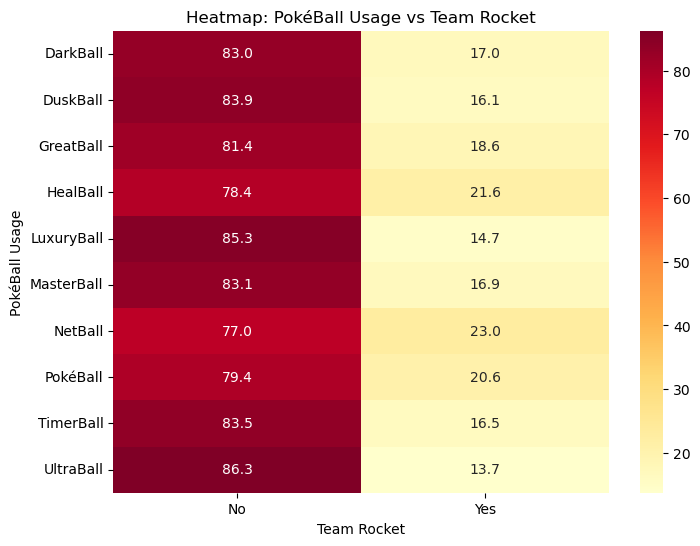

In [50]:
# Lets create a heatmap to visualize the correlation between the variables in %
pokeball_rocket_crosstab = pd.crosstab(df['PokéBall Usage'], df['Team Rocket'], normalize='index') * 100	

plt.figure(figsize=(8, 6))
sns.heatmap(pokeball_rocket_crosstab, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap: PokéBall Usage vs Team Rocket')
plt.ylabel('PokéBall Usage')
plt.xlabel('Team Rocket')
plt.show()

So as we can see, the most used PokéBalls used by Team Rocket members are:

1. NetBall
2. HeallBall
3. PokéBall

But this does not indicate a **Strong relationship**

## Win-ratio

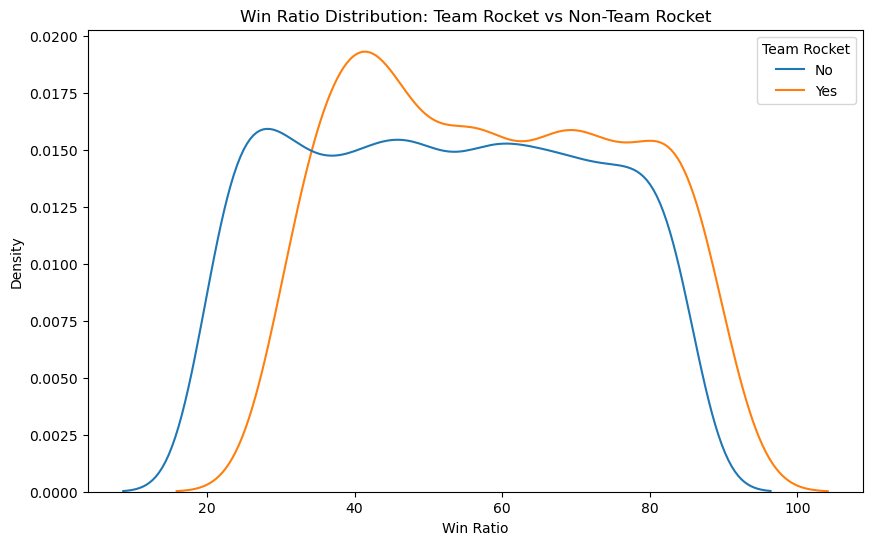

In [51]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Win Ratio', hue='Team Rocket', common_norm=False)
plt.title('Win Ratio Distribution: Team Rocket vs Non-Team Rocket')
plt.xlabel('Win Ratio')
plt.ylabel('Density')
plt.show()

In [52]:
print("Win ratio stats per group:")
df.groupby('Team Rocket')['Win Ratio'].describe()

Win ratio stats per group:


,count,mean,std,min,25%,50%,75%,max
Team Rocket,,,,,,,,
No,3280.0,52.081402,19.120262,20.0,35.0,52.0,69.0,85.0
Yes,720.0,58.866667,17.548550,30.0,43.0,58.0,74.0,90.0


### Conclusion:
1. Team rocket members have higher average, a 10 point differencial (up) in the minimum values, and a 5 point diferencial (up) in the maximum
2. Most Team Rocket members have a win-ratio on the range of 30% to 50%

**So to summmarize, Team Rocket members have a higher win-ratio than non-members, but the difference is not huge (about 7%)**

## Number of Migrations

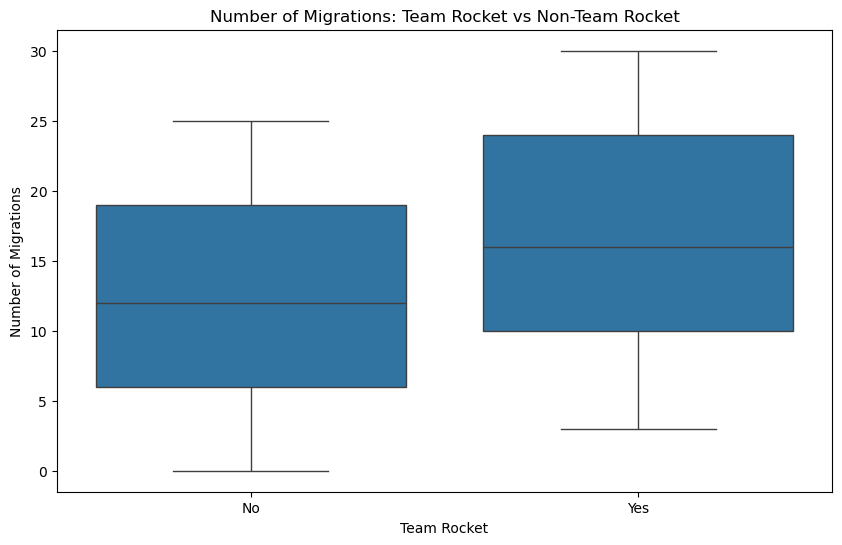

In [53]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Team Rocket', y='Number of Migrations')
plt.title('Number of Migrations: Team Rocket vs Non-Team Rocket')
plt.ylabel('Number of Migrations')
plt.show()

In [54]:
print("Migration statistics by group:")
print(df.groupby('Team Rocket')['Number of Migrations'].describe())

Migration statistics by group:
              count       mean       std  min   25%   50%   75%   max
Team Rocket                                                          
No           3280.0  12.505488  7.545165  0.0   6.0  12.0  19.0  25.0
Yes           720.0  16.586111  8.168485  3.0  10.0  16.0  24.0  30.0


### Conclusion:
- There is a 4 point differencial in migrations between Team Rocket and non-Team Rocket members, which is likely a result of the fact that Team Rocket members are more likely to migrate than non-Team Rocket members.
- Team Rocket members are noted to have at least 3 recorded migrations.

## Charity Participation

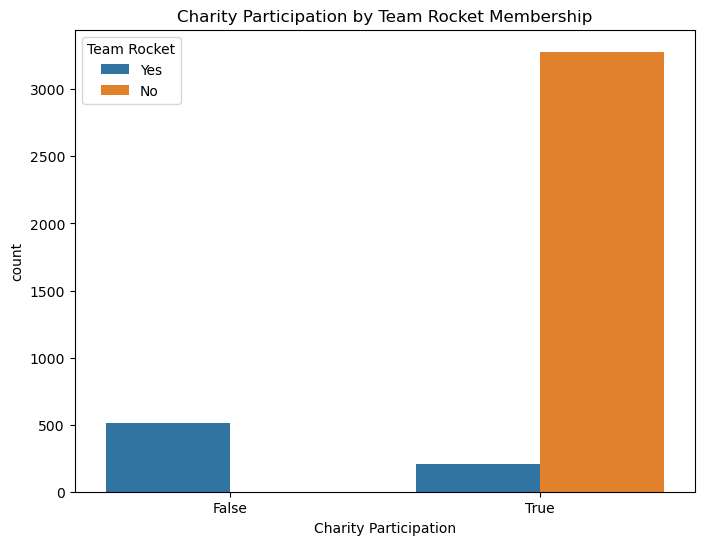

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Charity Participation', hue='Team Rocket')
plt.title('Charity Participation by Team Rocket Membership')
plt.show()

In [56]:
print("\nCharity Participation Rates:")
print(pd.crosstab(df['Team Rocket'], df['Charity Participation'], normalize='index'))


Charity Participation Rates:
Charity Participation   False   True 
Team Rocket                          
No                     0.0000  1.0000
Yes                    0.7125  0.2875


### Conclusion:
- All non-Team Rocket members participated in charity.
- Only 28% of Team Rocket members participated in charity.

## Profession Distribution

<Figure size 1000x600 with 0 Axes>

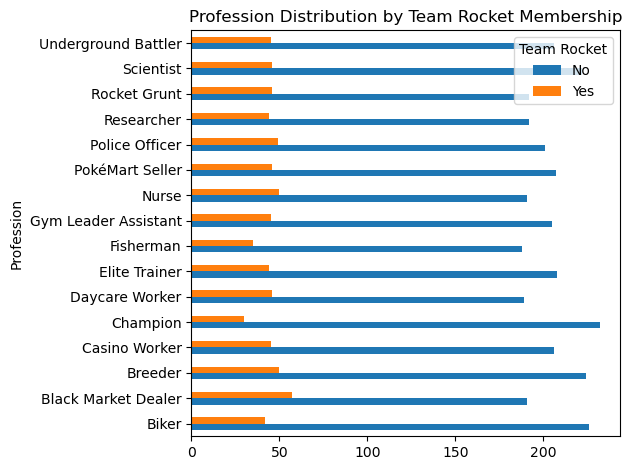

In [57]:
profession_counts = pd.crosstab(df['Profession'], df['Team Rocket'])
plt.figure(figsize=(10, 6))
profession_counts.plot(kind='barh')
plt.title('Profession Distribution by Team Rocket Membership')
plt.tight_layout()
plt.show()

In [58]:
print("\nTop 5 Professions per Group:")
print(df.groupby(['Team Rocket', 'Profession']).size().groupby('Team Rocket').nlargest(5))


Top 5 Professions per Group:
Team Rocket  Team Rocket  Profession         
No           No           Champion               232
                          Biker                  226
                          Breeder                224
                          Scientist              222
                          Elite Trainer          208
Yes          Yes          Black Market Dealer     57
                          Breeder                 50
                          Nurse                   50
                          Police Officer          49
                          Daycare Worker          46
dtype: int64


### Conclusion:
- It is unlikely a Team Rocket member is a Champion, but it is possible
- It is most likely that a Team Rocket member is a Black Market Dealer, a Breeder, a Nurse or a Police Officer.

## City Distribution


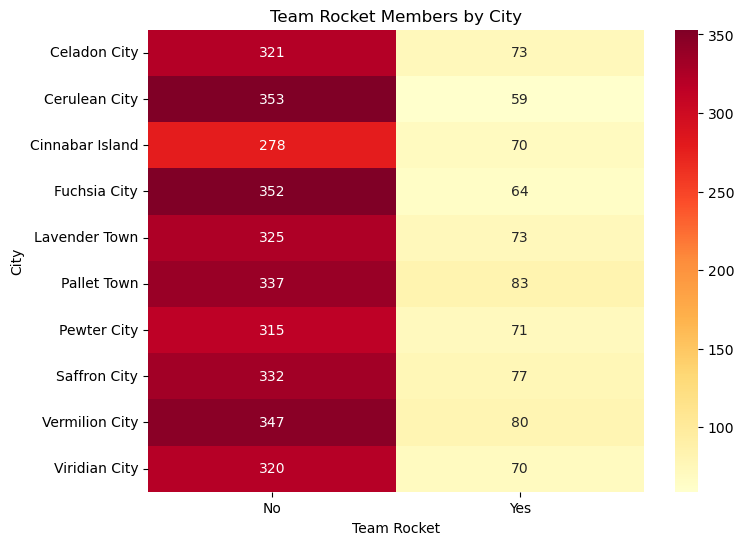

In [59]:
city_rocket = pd.crosstab(df['City'], df['Team Rocket'])
plt.figure(figsize=(8, 6))
sns.heatmap(city_rocket, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Team Rocket Members by City')
plt.show()

### Conclusion:
- Most Team Rocket members are located at Pallet Town, Vermilion City and Saffron City.

## Gym Badge distribution

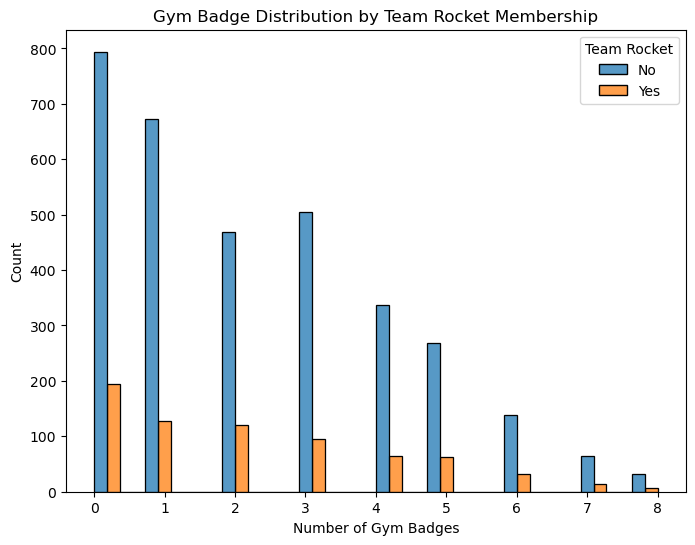

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Number of Gym Badges', hue='Team Rocket', multiple="dodge")
plt.title('Gym Badge Distribution by Team Rocket Membership')
plt.show()

In [61]:
print("\nGym Badge Statistics:")
print(df.groupby('Team Rocket')['Number of Gym Badges'].describe())


Gym Badge Statistics:
              count      mean       std  min  25%  50%  75%  max
Team Rocket                                                     
No           3280.0  2.240244  1.982901  0.0  1.0  2.0  4.0  8.0
Yes           720.0  2.191667  2.014395  0.0  0.0  2.0  4.0  8.0


### Conclusion:
- No relevant correlations were found

## Finally, lets prepare the dataset for Training and Validation

In [62]:
train_df, test_df, df_unlabeled = prepare_dataset(
    raw_data_path='../data/raw/pokemon_team_rocket_dataset.csv',
    processed_path='../data/processed',
    input_path='../input'
)